### **Analyze Gas Data**

Analyzes the data computed in get_gas_data.ipynb. Data is stored in a numpy array located in "Saved_Data/massive_halos_full_set.npy". The units for each key can be found here:

https://www.tng-project.org/data/docs/specifications/

All entries fall under the "PartType0" table except GroupMass and GroupCM which are described in the section titled Group Catalog.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u #(I would use this for unit conversions)
final_data = np.load("Saved_Data/massive_halos_full_set.npy", allow_pickle=True)

print("Number of Halos: "+str(len(final_data)))

print("\nAvailable Data:")
print('\n'.join(f'{key}' for key in final_data[0].keys()))

Number of Halos: 9

Available Data:
Coordinates
Velocities
Masses
InternalEnergy
ElectronAbundance
Density
GroupMass
GroupCM




Example below provides a 2D plot of the positions of gas particles within the most massive halo and the center of mass of the halo.

Gas Coordinate Array Shape:  (134506, 3)


Text(0, 0.5, 'y [Mpc/h]')

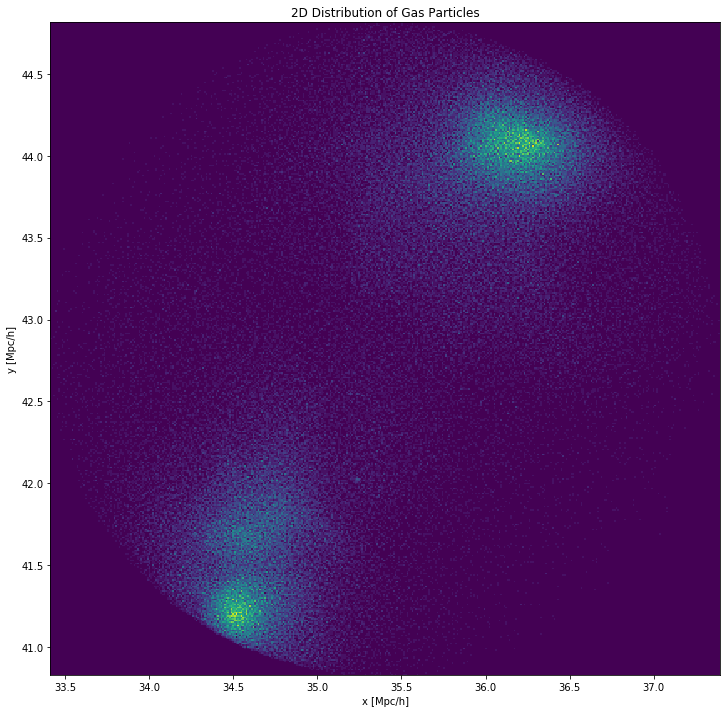

In [10]:
# Gas coordinates in kpc/h
gas_coords = final_data[5]['Coordinates']

# Get x and y coordinates of all gas particles and convert to Mpc/h
print("Gas Coordinate Array Shape: ", gas_coords.shape)
gas_x = gas_coords.T[0]/1000
gas_y = gas_coords.T[1]/1000

# Get the halo center of mass
halo_cm_x, halo_cm_y, _ = final_data[0]['GroupCM']/1000

# Plot result
plt.figure(figsize=(12,12))
plt.hist2d(gas_x, gas_y, bins=400)
plt.plot(halo_cm_x, halo_cm_y, marker='+', color="white")
plt.title("2D Distribution of Gas Particles")
plt.xlabel("x [Mpc/h]")
plt.ylabel("y [Mpc/h]")


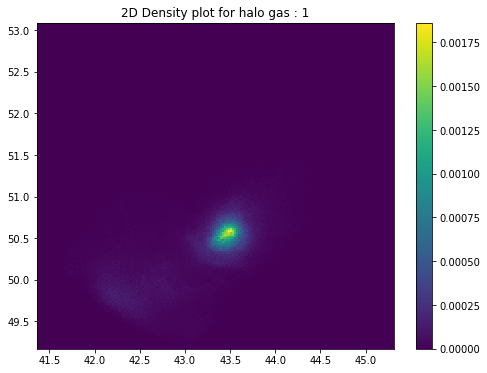

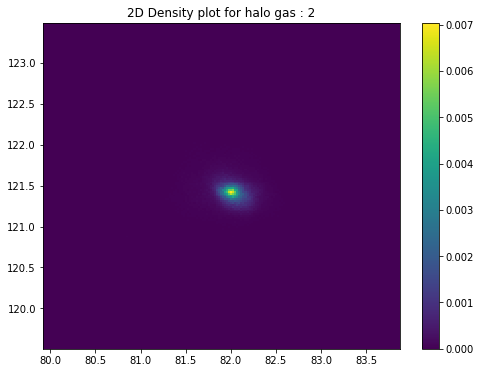

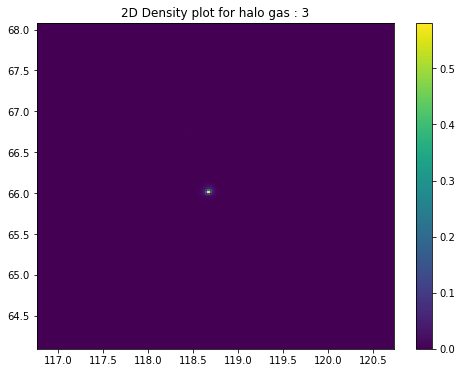

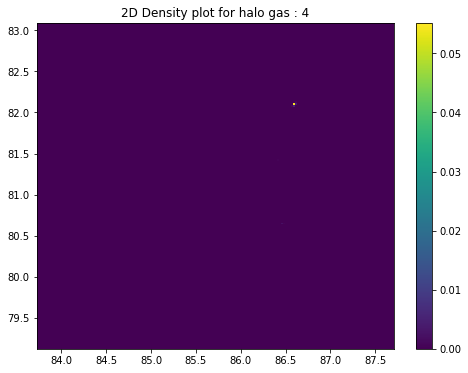

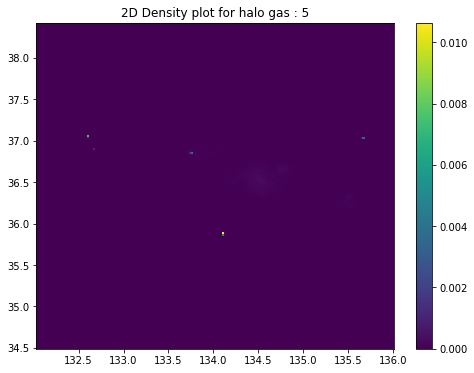

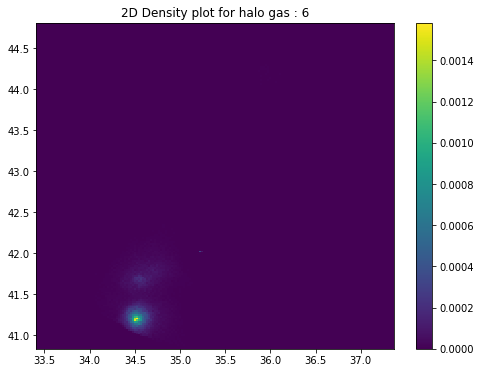

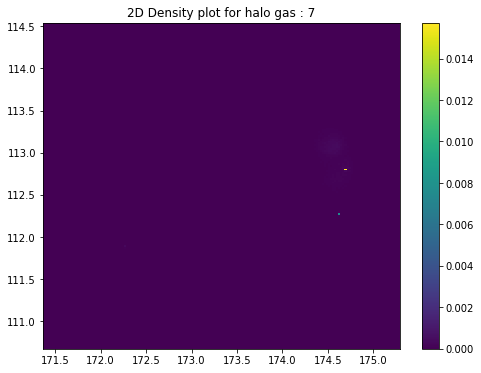

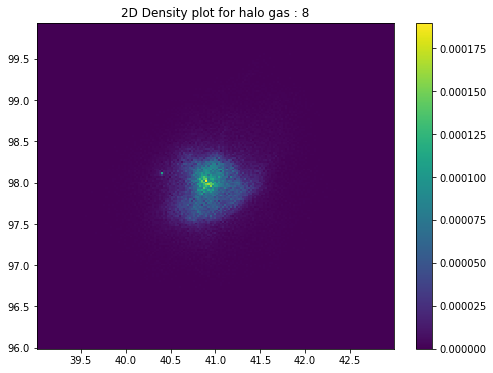

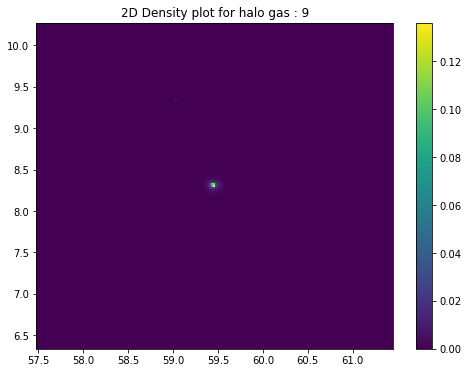

In [4]:
#density histograms for 9 large halos (improved resolution)

#The binned nature of the histograms may be cause for innacuracy in the density plots
#to minimize the innacuracy due to data in front and behind we can take a slice of the gas profile
for i in range (9):
    gas_coords = final_data[i]['Coordinates']
    gas_density = final_data[i]['Density']
    gas_x = gas_coords.T[0]/1000
    gas_y = gas_coords.T[1]/1000  
    gas_z = gas_coords.T[2]/1000
    gas_mean_z = np.sum(gas_z)/len(gas_z)
    half_indicies = np.where(gas_z >= gas_mean_z)
    i = i+1
    plt.figure(figsize=(8,6))
    plt.hist2d(gas_x[half_indicies], gas_y[half_indicies],bins=175, weights = gas_density[half_indicies])
    plt.title("2D Density plot for halo gas : %i" %i )
    plt.colorbar()

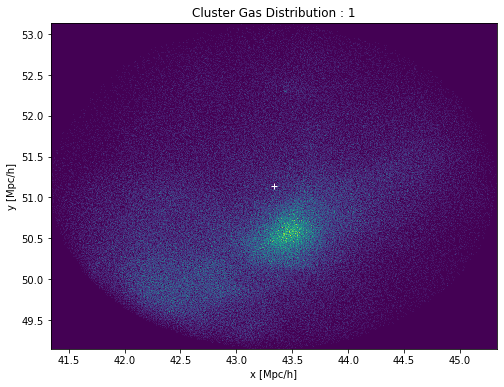

<Figure size 576x432 with 0 Axes>

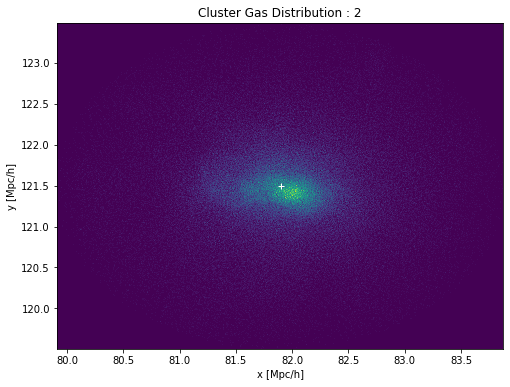

<Figure size 576x432 with 0 Axes>

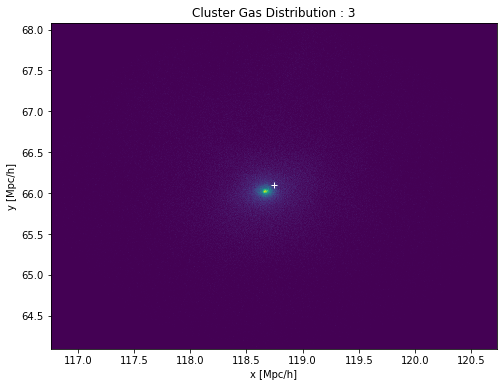

<Figure size 576x432 with 0 Axes>

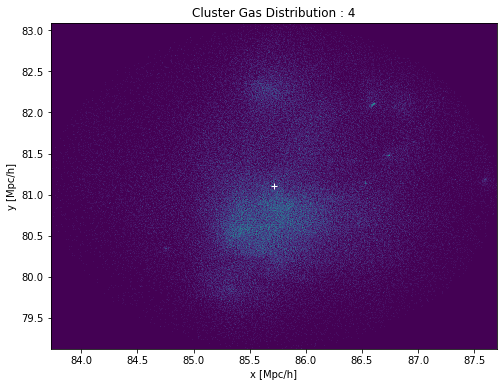

<Figure size 576x432 with 0 Axes>

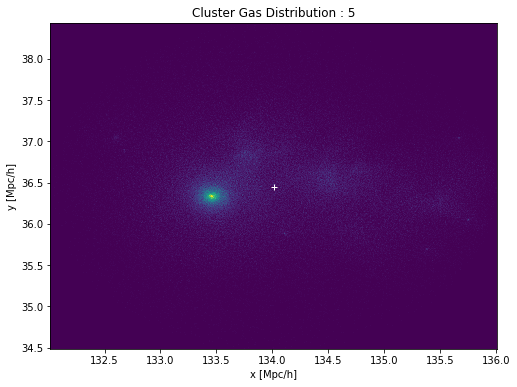

<Figure size 576x432 with 0 Axes>

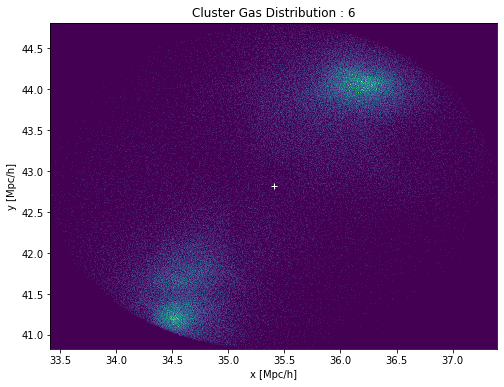

<Figure size 576x432 with 0 Axes>

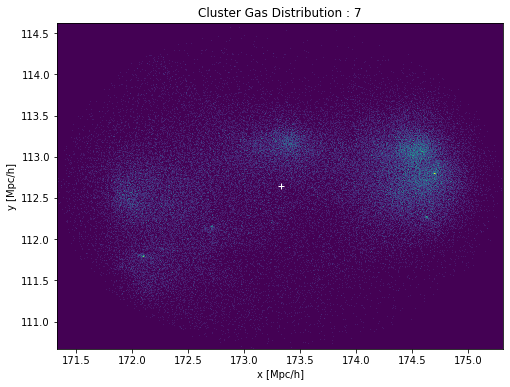

<Figure size 576x432 with 0 Axes>

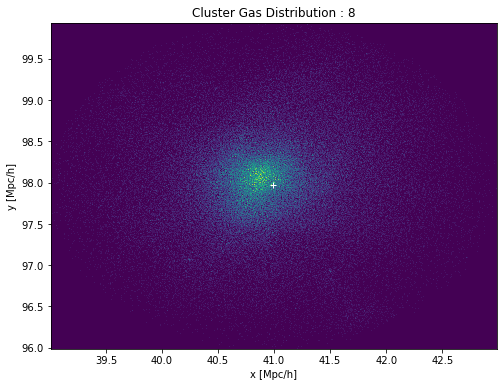

<Figure size 576x432 with 0 Axes>

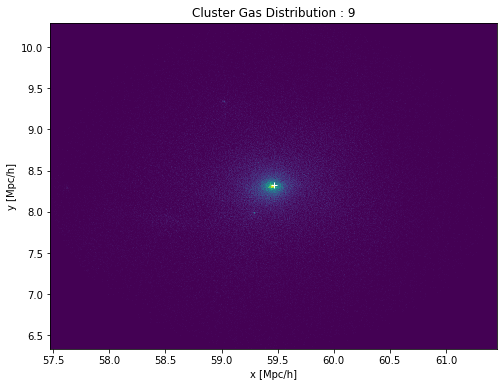

<Figure size 576x432 with 0 Axes>

In [11]:
#2D position histograms for 9 large halos

for i in range(9):    
    halo_cm_x, halo_cm_y, _ = final_data[i]['GroupCM']/1000
    gas_coords = final_data[i]['Coordinates']
    gas_x = gas_coords.T[0]/1000
    gas_y = gas_coords.T[1]/1000  
    plt.figure(figsize=(8,6))
    plt.hist2d(gas_x, gas_y, bins=500)
    plt.plot(halo_cm_x, halo_cm_y, marker='+', color="white")
    i=i+1 #improves clarity of plot title indicies 
    plt.title("Cluster Gas Distribution : %i" %i)
    plt.xlabel("x [Mpc/h]")
    plt.ylabel("y [Mpc/h]")
    plt.figure(figsize=(8,6))

In [40]:
from statistics import mean
mean(gas_temp)

384114530.0

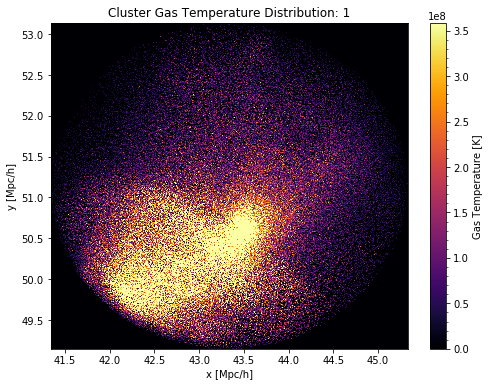

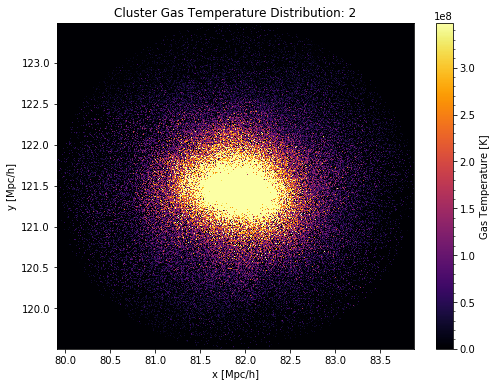

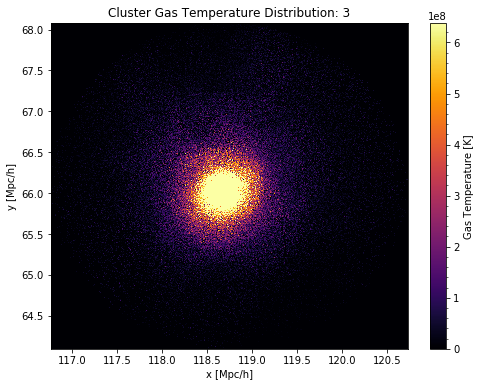

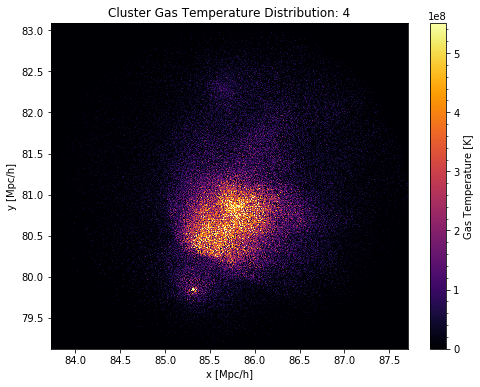

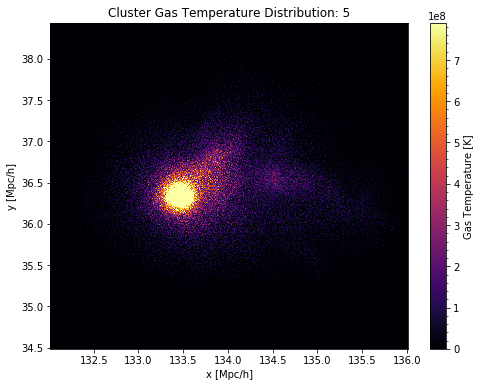

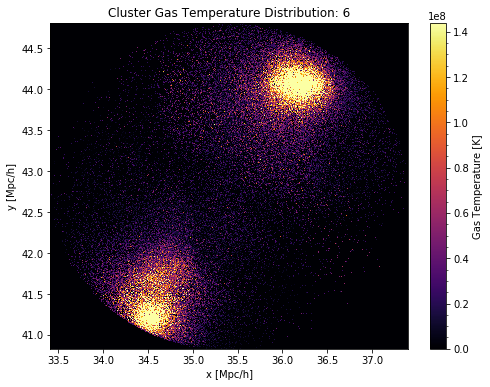

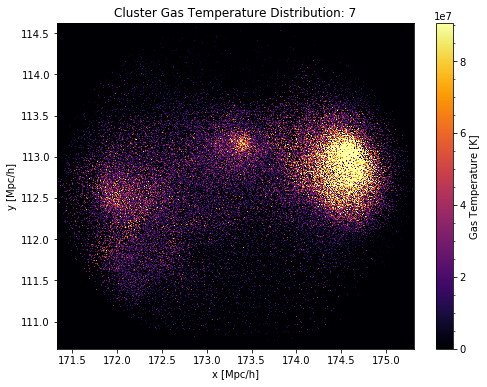

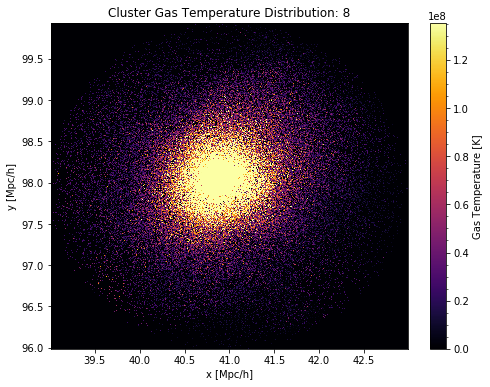

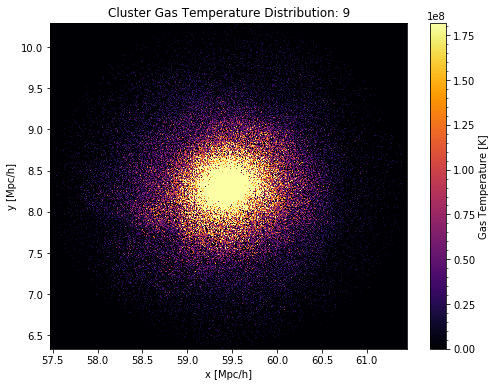

In [12]:
#Temperature histogram for 9 large halos

gamma = 5/3 #adiabadic index
ratio_EM = 1E10
x_h = 0.76
kb = 1.380649E-16
mp = 1.6726E-24 

for i in range(9):    
    gas_u = final_data[i]['InternalEnergy']
    gas_e_abundance = final_data[i]['ElectronAbundance']
    mean_mol_weight = 4*mp  / (1 + 3*x_h + 4*x_h*gas_e_abundance) 
    gas_temp = (gamma - 1) * (gas_u/kb) * mean_mol_weight * ratio_EM
    gas_coords = final_data[i]['Coordinates']
    gas_x = gas_coords.T[0]/1000
    gas_y = gas_coords.T[1]/1000
    i=i+1 #improves clarity of plot title indicies 
    plt.figure(figsize=(8,6))
    plt.xlabel("x [Mpc/h]")
    plt.ylabel("y [Mpc/h]")
    plt.hist2d(gas_x, gas_y, bins=500, weights = gas_temp,cmap= 'inferno')
    plt.title("Cluster Gas Temperature Distribution: %i" %i )
    cbar = plt.colorbar()
    cbar.minorticks_on()
    cbar.set_label('Gas Temperature [K]')
    plt.clim(0, 1.25*max(gas_temp))

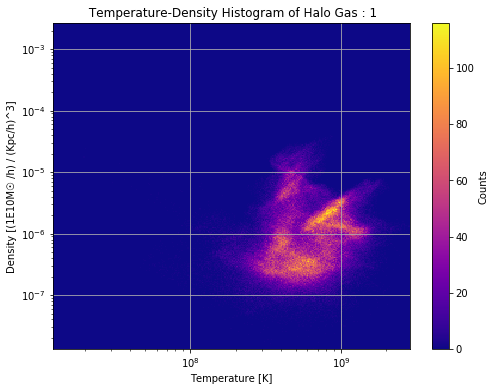

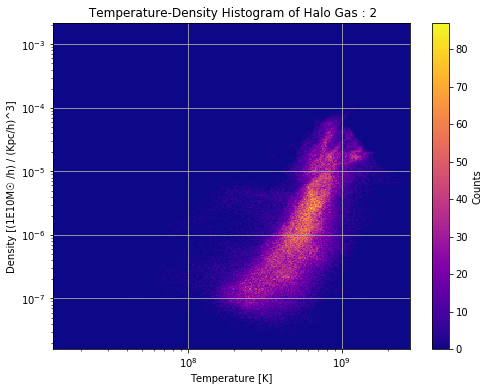

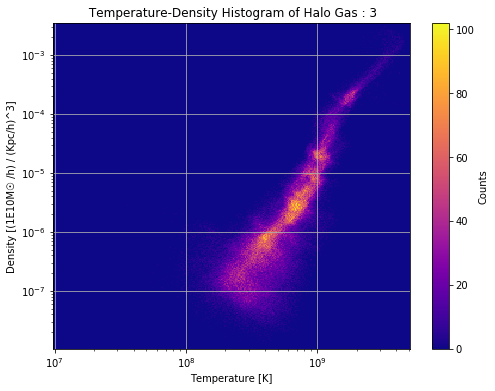

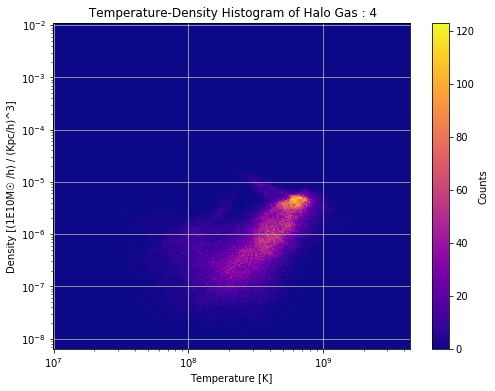

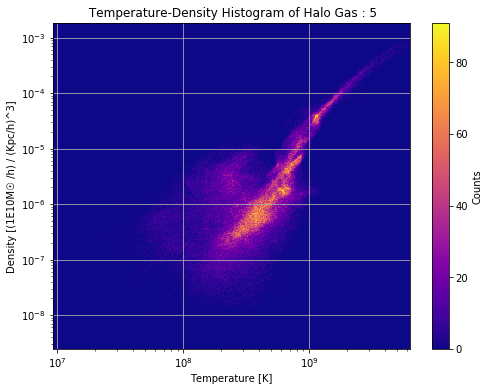

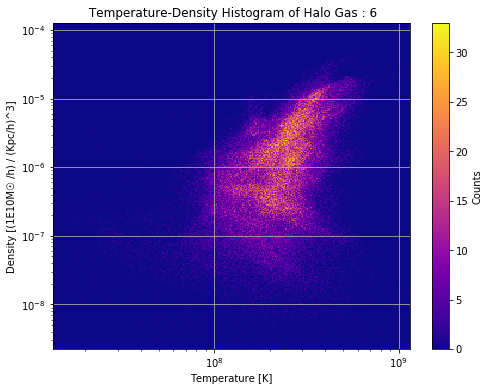

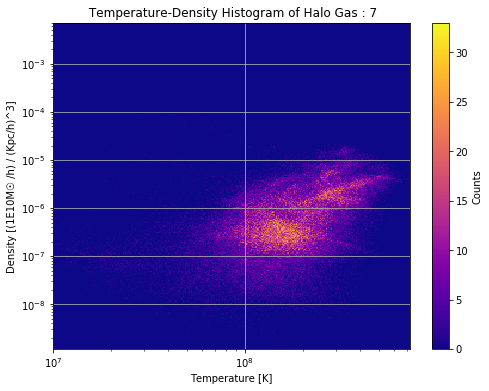

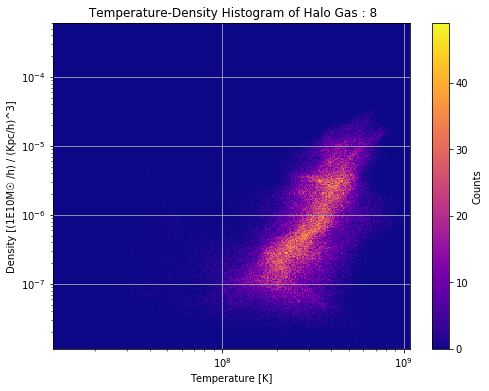

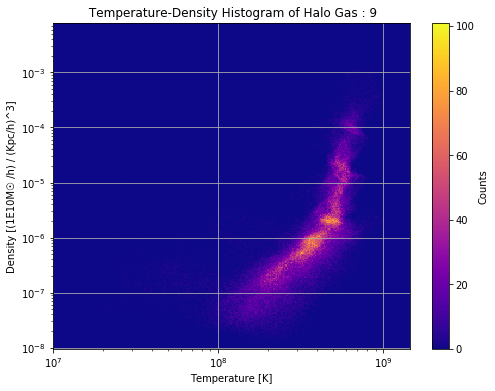

In [44]:
#Temperature-Density comparison for 9 large halos
from statistics import mean

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b




#constants for calculating temperature of halo gas
gamma = 5/3 #adiabadic index
ratio_EM = 10E10
x_h = 0.76

for i in range(9):    
    #fething data
    gas_u = final_data[i]['InternalEnergy']
    gas_e_abundance = final_data[i]['ElectronAbundance']
    gas_density = final_data[i]['Density']
    
    #calclating temperature as a function of mean molecular weight
    mean_mol_weight = 4*mp  / (1 + 3*x_h + 4*x_h*gas_e_abundance) 
    gas_temp = (gamma - 1) * (gas_u/kb) * mean_mol_weight * ratio_EM
   
    i=i+1 #improves clarity of plot title index 
    plt.figure(figsize=(8,6))
    #creating logarithmic bins spacing
    bin_x = np.logspace( np.log10(100*np.min(gas_temp)), np.log10(np.max(gas_temp)), 300)
    bin_y = np.logspace( np.log10(np.min(gas_density)), np.log10(np.max(gas_density)), 300)
    
    #plot 2d hist
    plt.hist2d(gas_temp, gas_density, bins = [bin_x,bin_y], cmap = 'plasma')
    #plt.xlim( 10*np.min(gas_temp),np.max(gas_temp))
    plt.loglog()
    plt.title(" Temperature-Density Histogram of Halo Gas : %i" %i)
    plt.ylabel('Density [(1E10M☉ /h) / (Kpc/h)^3]')
    plt.xlabel('Temperature [K]')
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    plt.grid()
    
   # temp_ascending = np.sort(gas_temp)
   # m, b = best_fit_slope_and_intercept(gas_temp,gas_density)
    #regression_line = [(m*temp)+b for temp in temp_ascending]
    #plt.plot(temp_ascending,regression_line,'y--')
 

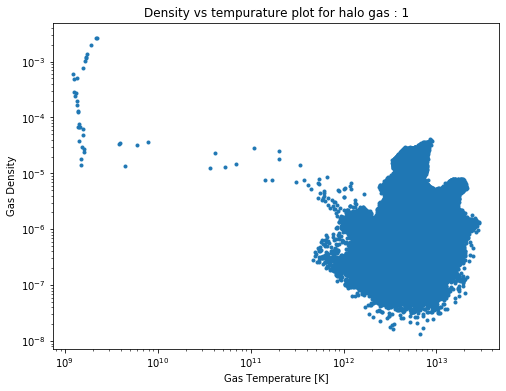

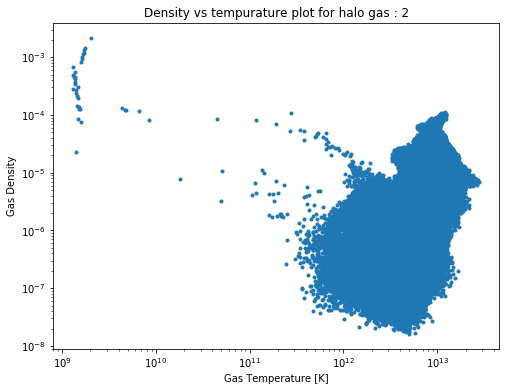

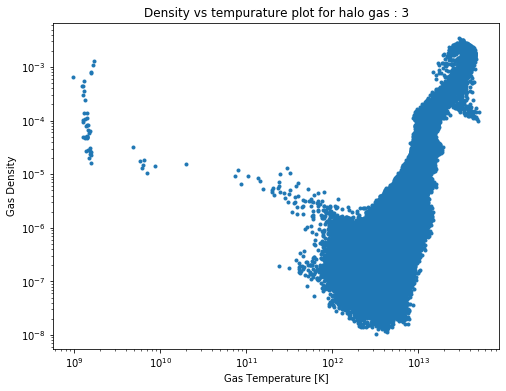

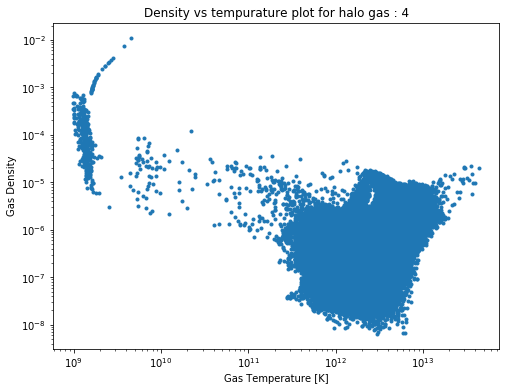

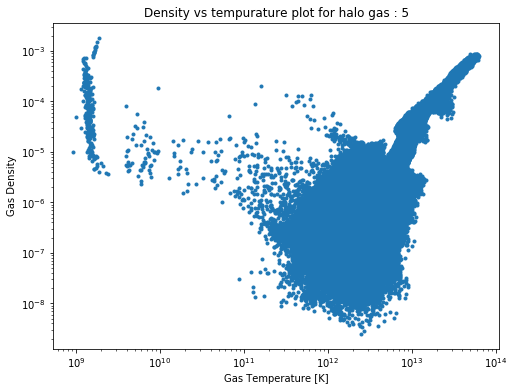

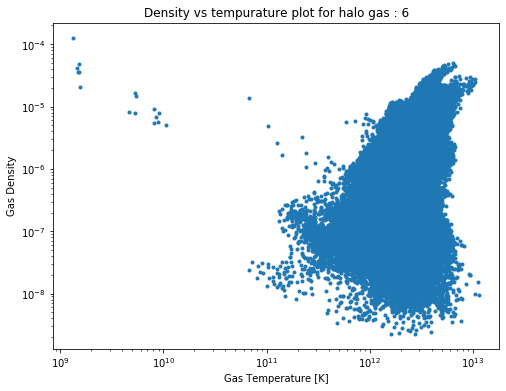

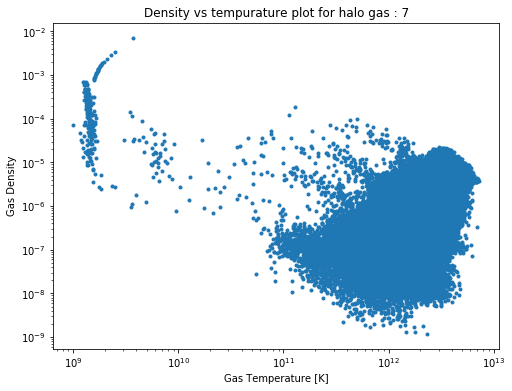

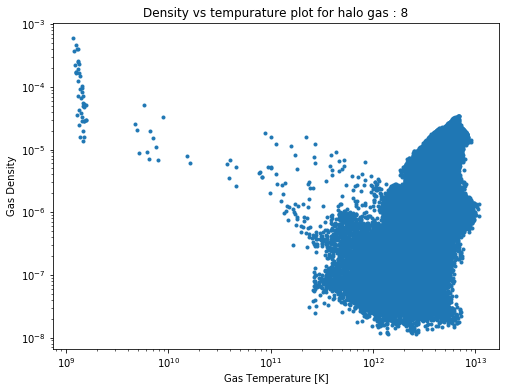

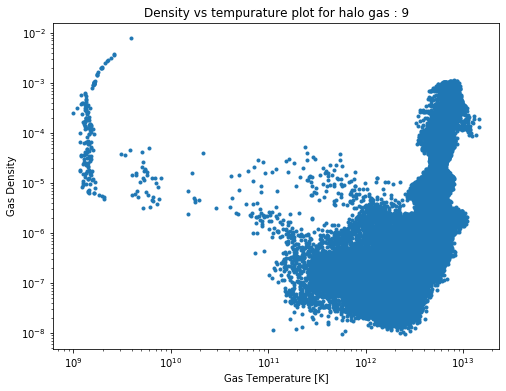

In [45]:
import scipy.constants as sci

gamma = 5/3 #adiabadic index
ratio_EM = 10E10
x_h = 0.76

for i in range(9):    
    gas_u = final_data[i]['InternalEnergy']
    gas_e_abundance = final_data[i]['ElectronAbundance']
    mean_mol_weight = 4*sci.m_p  / (1 + 3*x_h + 4*x_h*gas_e_abundance) 
    gas_temp = (gamma - 1) * (gas_u/sci.k) * mean_mol_weight * ratio_EM
    gas_density = final_data[i]['Density']
    i=i+1 #improves clarity of plot title indicies 
    plt.figure(figsize=(8,6))
    plt.plot(gas_temp,gas_density,'.')
    plt.loglog()
    plt.title("Density vs tempurature plot for halo gas : %i" %i)
    plt.xlabel('Gas Temperature [K]')
    plt.ylabel('Gas Density')
